## Callie Models

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import pickle
import os
homedir = os.path.expanduser('~')
datadir = f"{homedir}/uoedrive/data/CallieModels/original_format/"

In [3]:
with open(f"{datadir}/t1400g1000f1_m0.0_co1.0.spec") as f:
    data = f.readlines()

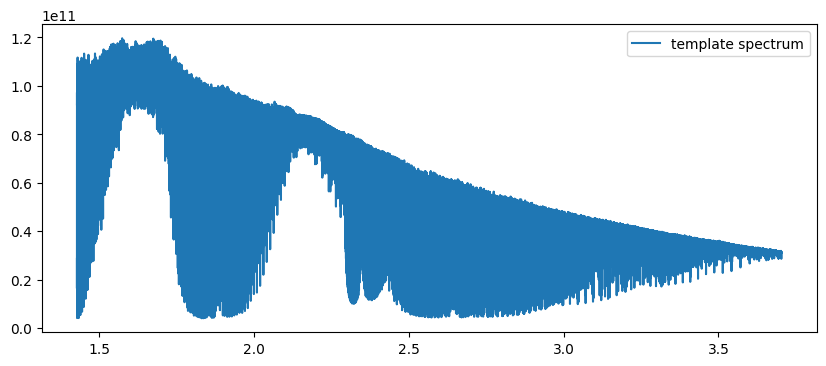

In [4]:
model = np.array([[data[i].split("\t")[0], data[i].split("\t")[1]] for i in range(2, len(data))], dtype=float)
plt.figure(figsize=(10,4))
plt.plot(model[:,0], model[:,1], label="template spectrum")
plt.legend()

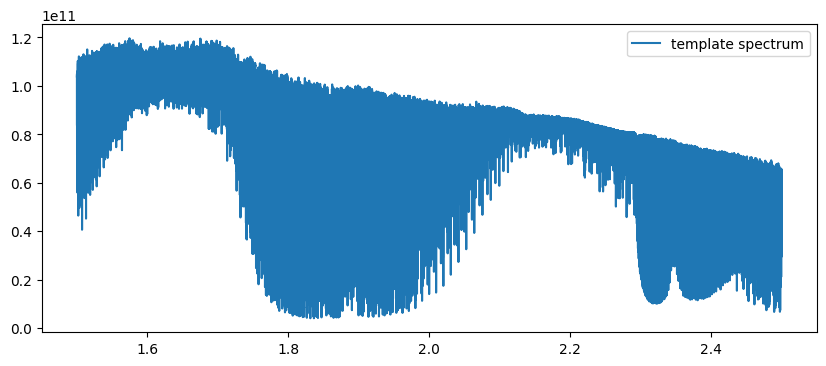

In [5]:
# cut 
plt.figure(figsize=(10,4))
tind = (model[:,0] > 1.5) * (model[:,0] < 2.5)
lam = model[tind,0]
template = model[tind,1]
plt.plot(lam, template, label="template spectrum")
plt.legend()

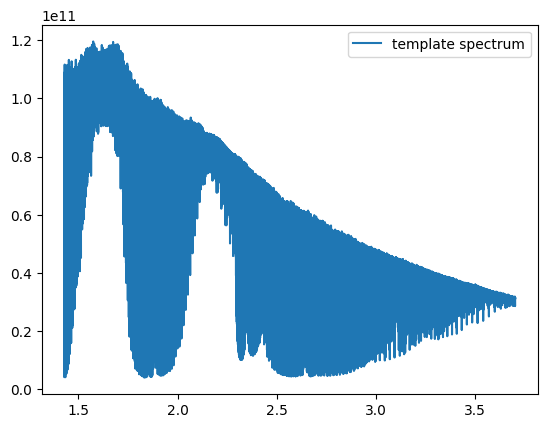

In [6]:
sorted_model = model[model[:, 0].argsort()]
plt.plot(sorted_model[:,0], sorted_model[:,1], label="template spectrum")
plt.legend()

### Cut all and save

t1500g1000f1_m0.0_co1.0
t1400g1000f8_m0.0_co1.0
t1500g1000f8_m0.0_co1.0
t1400g1000f1_m0.0_co1.0
t1400g1000f4_m0.0_co1.0
t1400g1000f3_m0.0_co1.0
t1500g1000f2_m0.0_co1.0
t1400g1000nc_m0.0_co1.0
t1500g1000nc_m0.0_co1.0
t1400g1000f2_m0.0_co1.0
t1500g1000f3_m0.0_co1.0
t1500g1000f4_m0.0_co1.0


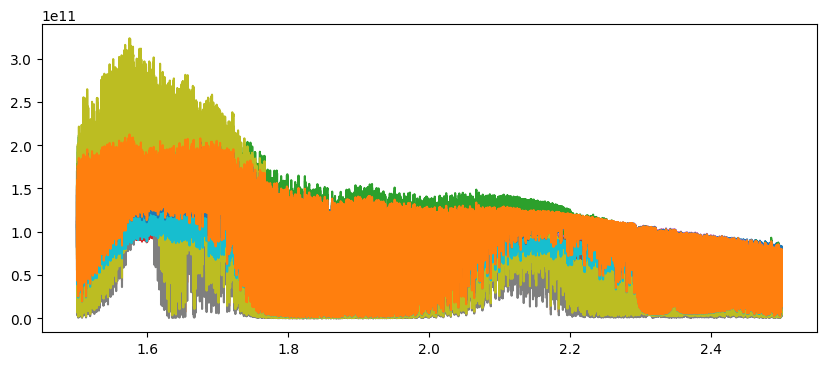

In [7]:
plt.figure(figsize=(10,4))
for file in glob.glob(f"{homedir}/uoedrive/data/CallieModels/original_format/t*.spec"):
    filename=file.split("/")[-1][:-5]
    print(filename)
    with open(file) as f:
        data = f.readlines()
    model = np.array([[data[i].split("\t")[0], data[i].split("\t")[1]] for i in range(2, len(data))], dtype=float)

    tind = (model[:,0] > 1.50) * (model[:,0] < 2.50)
    model = model[tind,:]
    model = model[model[:, 0].argsort()] # sort along wl
    
    plt.plot(model[:,0],model[:,1])
    c1 = fits.Column(name='wl', array=model[:,0], format="E", unit="micron")
    c2 = fits.Column(name='flux', array=model[:,1], format="E", unit="W/m2/m")
    t = fits.BinTableHDU.from_columns([c1, c2])
    savename = f"{homedir}/uoedrive/data/CallieModels/{filename}.fits"
    t.writeto(savename,overwrite=True)